<a href="https://colab.research.google.com/github/inci1kabak/ANN/blob/main/ANN_UYGULAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Mnist veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print("Eğitim seti boyutu:", x_train.shape,y_train.shape )


Eğitim seti boyutu: (60000, 28, 28) (60000,)


In [5]:
print("Test seti boyutu:", x_test.shape, y_test.shape)


Test seti boyutu: (10000, 28, 28) (10000,)


In [6]:
num_labels=len(np.unique(y_train))

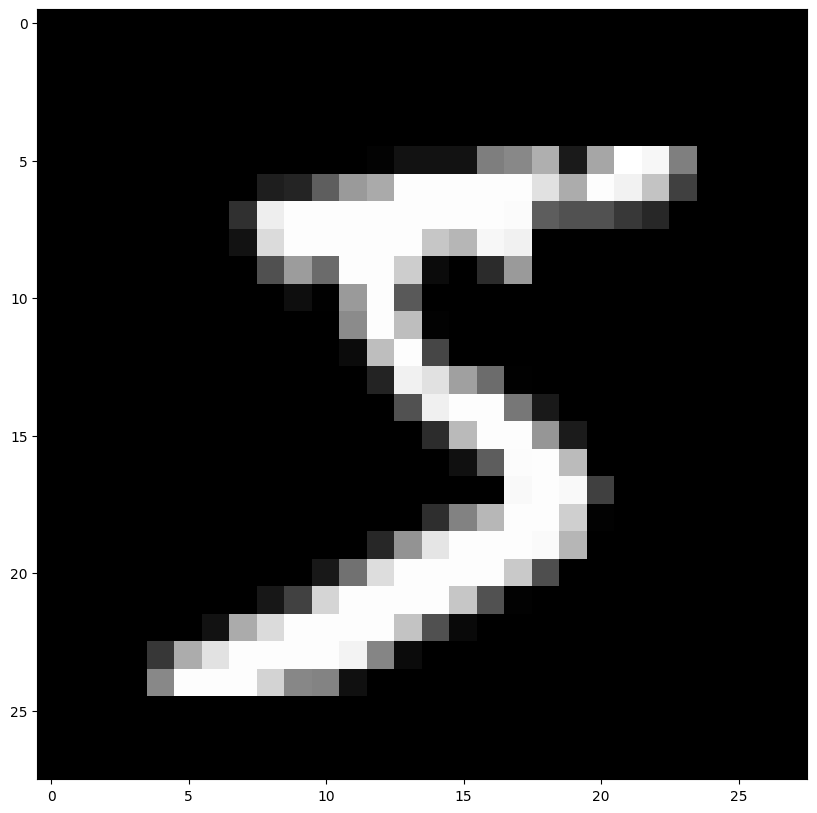

In [10]:
#Veri setinden örnekler gösterilmesi
plt.figure(figsize=(10,10))
plt.imshow(x_train[0], cmap='gray')



#RGB
#Renkler  RGB aracılığıyla görünür.
R:255
G:255
B:255
BEYAZ
HEPSİ 255 OLDUĞUNDA EN PARLAK DEĞER YANİ BEYAZDIR.
*******
R:0
G:0
B:0
SİYAH
HEPSİ 0 OLDUĞUNDA EN KARANLIK YANİ SİYAHTIR.
*********


In [12]:
x_train[2].sum()


19443


#shape()
#sum() toplamı verir.
#mean() ortalama verir.


In [ ]:
#VERİYİ HAZIRLAMAK
#1-) Encoding
#2-) Reshaping
#3-)Normalization


In [13]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
y_train[0:8]


array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [15]:
y_train[3:9]


array([1, 9, 2, 1, 3, 1], dtype=uint8)

In [16]:
#ENCODİNG
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [17]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [19]:
image_size=x_train.shape[1]
image_size

28

In [20]:
print(f"x_train bıyutu:{x_train.shape}")
print(f"x_test boyutu:{x_test.shape}")

x_train bıyutu:(60000, 28, 28)
x_test boyutu:(10000, 28, 28)


# reshape()  verileri yeni bir şekle  düzenler.



In [21]:
x_train = x_train.reshape(x_train.shape[0], 28,28, 1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

print(f"x_train bıyutu:{x_train.shape}")
print(f"x_test boyutu:{x_test.shape}")

x_train bıyutu:(60000, 28, 28, 1)
x_test boyutu:(10000, 28, 28, 1)


#STANDARDİZATİON
# sonuca daha hızlı gideriz. öğrenme süreci pozitif anlamda etkilenir

#0-255 lik değerlerimi 0-1 e indirelim.



In [22]:
x_train= x_train.astype('float32')/255
x_test= x_test.astype('float32')/255


#Modelleme


#Sinir ağı mimarisini tanımlamak


In [24]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation='relu', name='layer1'),
    Dense(units=num_labels, activation='softmax', name='output_layer')])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#Veri setini detaylı incelemek için
# summary()   >>>>  Özet bilgileri verir.
# model.compile() >>>>>> derlemek


In [25]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test) )


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9943 - loss: 0.0236 - precision: 0.9953 - recall: 0.9934 - val_accuracy: 0.9780 - val_loss: 0.0716 - val_precision: 0.9803 - val_recall: 0.9762
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9947 - loss: 0.0212 - precision: 0.9954 - recall: 0.9940 - val_accuracy: 0.9786 - val_loss: 0.0708 - val_precision: 0.9803 - val_recall: 0.9769
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9960 - loss: 0.0169 - precision: 0.9967 - recall: 0.9955 - val_accuracy: 0.9777 - val_loss: 0.0747 - val_precision: 0.9795 - val_recall: 0.9763
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9968 - loss: 0.0148 - precision: 0.9973 - recall: 0.9964 - val_accuracy: 0.9767 - val_loss: 0.0767 - val_precision: 0.9792 - val_recall: 0.9757
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9970 - loss: 0.0136 - precision: 0.9973 - recall: 0.9965 - val_accuracy: 0.9802 - val_loss: 0.

#Model doğrulama


#Accuracy ve Loss Grafikleri


In [31]:
history=model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test) )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9992 - loss: 0.0054 - precision: 0.9993 - recall: 0.9991 - val_accuracy: 0.9794 - val_loss: 0.0782 - val_precision: 0.9805 - val_recall: 0.9785
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9995 - loss: 0.0042 - precision: 0.9995 - recall: 0.9995 - val_accuracy: 0.9790 - val_loss: 0.0842 - val_precision: 0.9805 - val_recall: 0.9780
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9994 - loss: 0.0040 - precision: 0.9995 - recall: 0.9994 - val_accuracy: 0.9789 - val_loss: 0.0879 - val_precision: 0.9803 - val_recall: 0.9781
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9983 - loss: 0.0070 - precision: 0.9984 - recall: 0.9981 - val_accuracy: 0.9788 - val_loss: 0.0847 - val_precision: 0.9798 - val_recall: 0.9779
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9998 - loss: 0.0029 - precision: 0.9998 - recall: 0.9998 - val_accuracy: 0.9798 - val_loss: 0.

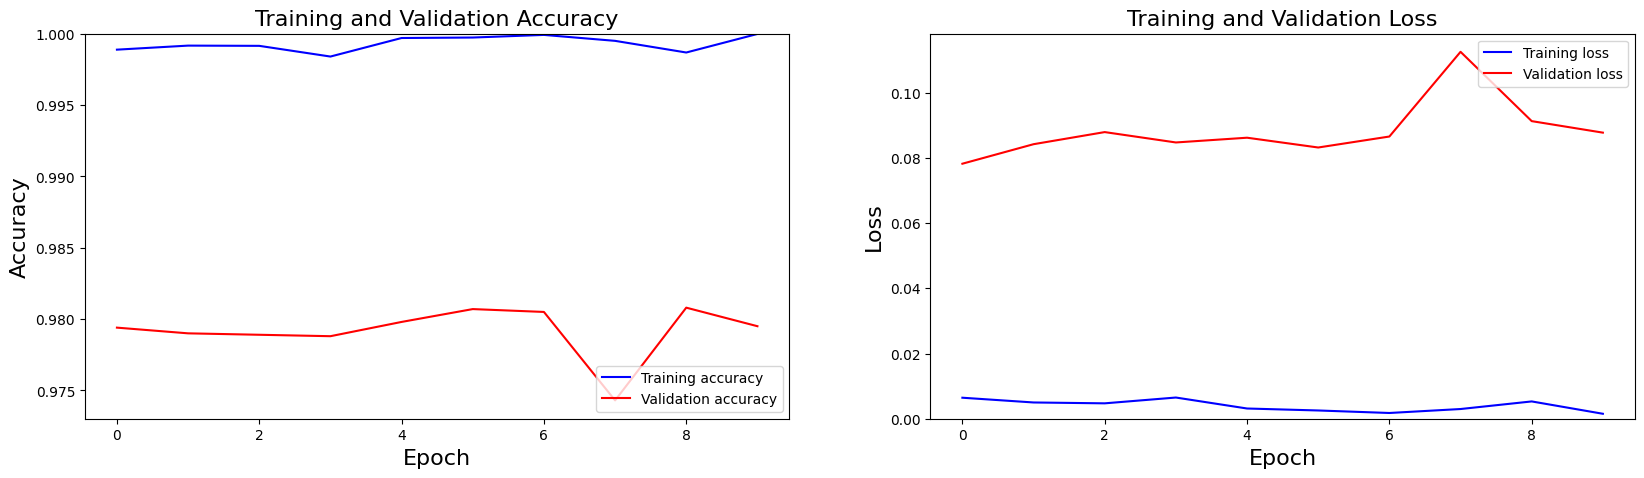

In [32]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)

#****************************************
plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label='Training loss')
plt.plot(history.history['val_loss'], color='r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize=16)
plt.show()


#Tahmin


In [34]:
import random
random= random.randint(0, x_test.shape[0])

random


2434

In [35]:
test_image = x_test[random]


In [36]:
y_test[random]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

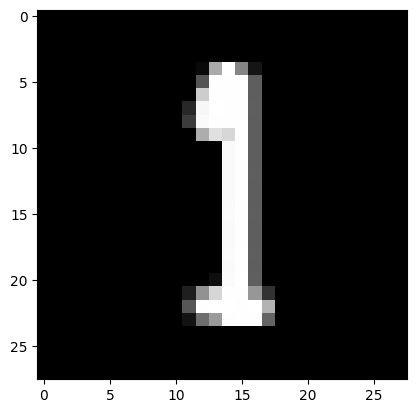

In [37]:
plt.imshow(test_image.reshape(28,28), cmap='gray');


In [38]:
test_data= x_test[random].reshape(1,28,28,1)

In [40]:
probability=model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [41]:
probability

array([[3.4175381e-14, 1.0000000e+00, 8.0106893e-10, 1.2814555e-09,
        3.9958667e-17, 6.8274032e-11, 1.6291836e-15, 1.3972183e-09,
        9.9288409e-09, 6.9351698e-11]], dtype=float32)

In [42]:
predicted_classes = np.argmax(probability)
predicted_classes

1